NOTICE:

Since exploratory data analysis and data preprocessing has been done previously, this notebook only includes the necassary parts for feature selection.

The notebook for exploratory data analysis can be accessed at:
https://github.com/McGill-MMA-EnterpriseAnalytics/Customer-Aquisition/blob/main/Pre-processing%20-%20Data%20Description%20(v0.0).ipynb

And the notebook for data preprocessing can be accessed at:
https://github.com/McGill-MMA-EnterpriseAnalytics/Customer-Aquisition/blob/main/Preprocessing%20(v0.0).ipynb


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
df_raw = pd.read_csv("/content/drive/MyDrive/Datasets/media prediction and its cost.csv")

In [3]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_raw.columns:
    uni_len = len(set(df_raw[c]))
    dtype = df_raw[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx).1


In [4]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in num_cols:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(df_raw[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(df_raw[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

outlier_preds

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but I

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1
60424,1,-1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,1
60425,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
60426,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1


In [5]:
df_woOut = df_raw.iloc[outlier_pred == 1]
df_woOut

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
6,Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


Text(0.5, 1.0, 'Correlation Matrix')

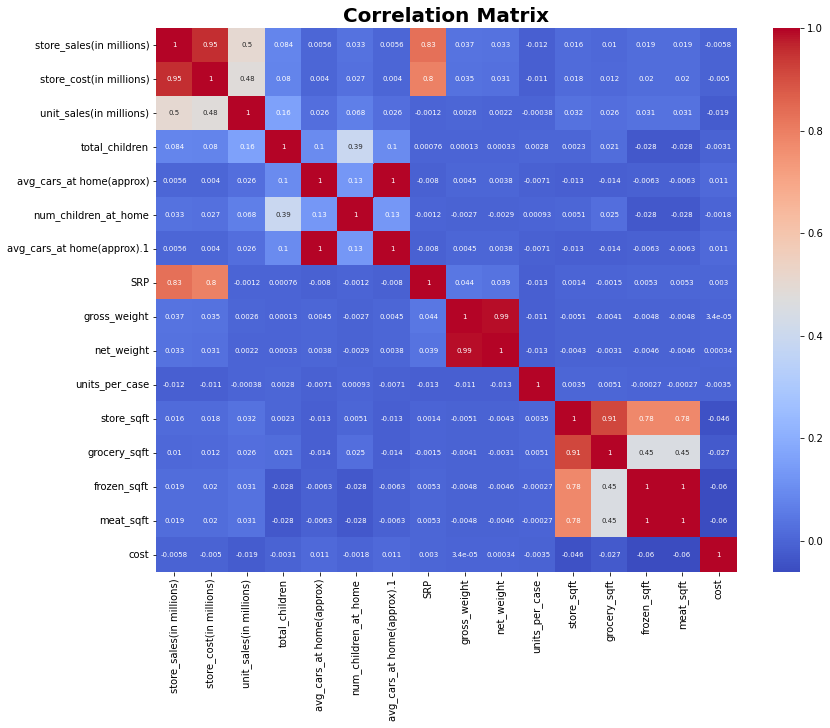

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

# Feature Engineering

According to the correlation matrix, we will do feature engineering to preserve as much data as possible at this stage while not facing multicollinearity.

In [6]:
df_woOut['sales_to_cost_ratio'] = df_woOut['store_sales(in millions)'] / df_woOut['store_cost(in millions)']
df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
df_woOut['meat_to_total_ratio'] = df_woOut['meat_sqft'] / df_woOut['store_sqft']

<ipython-input-6-dd7f76fe2813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['sales_to_cost_ratio'] = df_woOut['store_sales(in millions)'] / df_woOut['store_cost(in millions)']
<ipython-input-6-dd7f76fe2813>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
<ipython-input-6-dd7f76fe2813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [7]:
df_woOut = df_woOut.drop(['store_sales(in millions)', 'store_cost(in millions)', 'frozen_sqft', 'meat_sqft', 'grocery_sqft', 'store_sqft',
                          'gross_weight', 'avg_cars_at home(approx).1', 'grocery_sqft'], axis = 1)

In [8]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_woOut.columns:
    uni_len = len(set(df_woOut[c]))
    dtype = df_woOut[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home


Text(0.5, 1.0, 'Correlation Matrix')

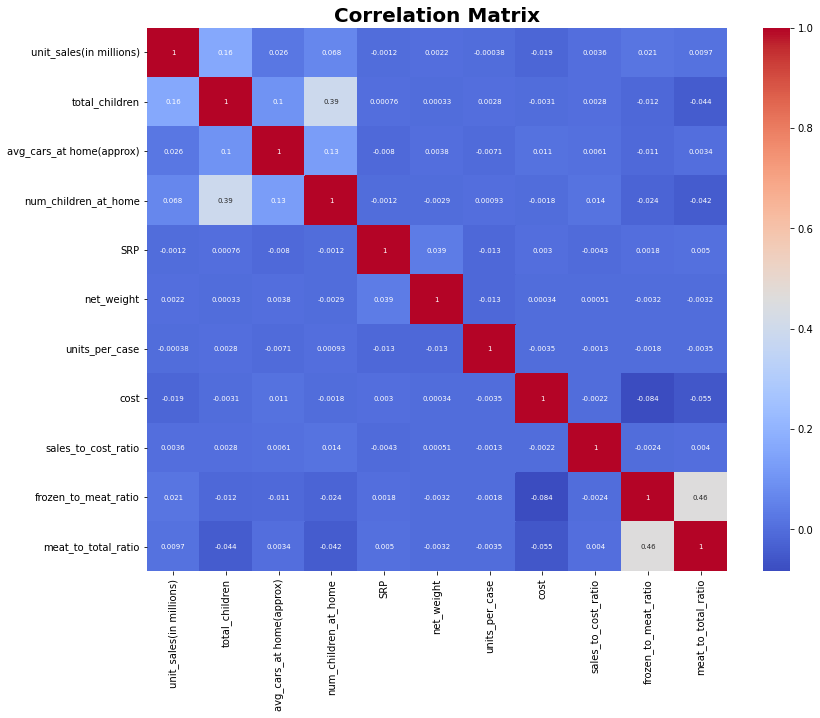

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

In [14]:
cols = [c for c in num_cols if c != 'cost'] # exclude target

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
MinMax_scaled = min_max_scaler.fit_transform(df_woOut[cols])

MinMax_scaled

array([[ 0.2       , -0.6       , -0.5       , ...,  0.05405405,
         0.11000332,  0.26845737],
       [-0.2       , -1.        ,  1.        , ..., -0.80851064,
         0.11000332,  0.26845737],
       [-0.6       ,  0.6       , -0.5       , ...,  0.05405405,
         0.11000332,  0.26845737],
       ...,
       [-0.6       , -0.6       ,  0.5       , ..., -0.73913043,
        -0.4091355 ,  0.19257961],
       [-0.2       , -0.2       ,  1.        , ...,  0.83870968,
         0.64177236, -0.98319777],
       [ 0.2       ,  0.2       , -0.5       , ..., -0.73913043,
         0.64177236, -0.98319777]])

In [15]:
cols = [c for c in num_cols if c != 'cost'] # exclude target

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_woOut[cols])
std_scaled

array([[ 1.09602519, -1.03128914, -1.08330242, ...,  0.39259738,
        -0.01604716,  0.18363349],
       [-0.11019699, -1.70201487,  1.61780374, ..., -1.11761199,
        -0.01604716,  0.18363349],
       [-1.31641916,  0.98088805, -1.08330242, ...,  0.39259738,
        -0.01604716,  0.18363349],
       ...,
       [-1.31641916, -1.03128914,  0.71743502, ..., -0.99613863,
        -0.97003583,  0.05803928],
       [-0.11019699, -0.36056341,  1.61780374, ...,  1.76640074,
         0.96115125, -1.88812817],
       [ 1.09602519,  0.31016232, -1.08330242, ..., -0.99613863,
         0.96115125, -1.88812817]])

In [16]:
#df = pd.DataFrame(std_scaled, columns = [c for c in num_cols if c != 'cost'])
df = pd.DataFrame(MinMax_scaled, columns = [c for c in num_cols if c != 'cost'])

# Concatenate standardized/normalized numerical columns with the others
df = pd.concat([df.reset_index(drop=True), 
                df_woOut[cate_cols + pre_dum_cols].reset_index(drop=True)], axis=1)

### Dropping irrelevant attributes

We will drop irrelevant attributes or attributes that have too many variables to avoid over-complicating our model.

In [17]:
df = df.drop(['food_category', 'food_department', 'brand_name', 'store_city', 'promotion_name'], axis = 1)

### Dummifying categorical variables



Since 'media_type' will be our treatment for the causal inference, we encode it differently not to add too many features/predictors to our model.

In [18]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit_transform(df['media_type'].tolist())

# to decode values 
# label_encoder.inverse_transform([1, 1, 0])

df['media_type_labeled'] = label_encoder.fit_transform(df['media_type'].tolist())

In [19]:
# Dummify categorical variables except for 'media type'
df = pd.get_dummies(df[[c for c in df.columns if c != 'media_type']], drop_first = True)

In [20]:
df

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,units_per_case,sales_to_cost_ratio,frozen_to_meat_ratio,meat_to_total_ratio,...,store_type_Supermarket,store_state_CA,store_state_DF,store_state_Guerrero,store_state_Jalisco,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas
0,0.2,-0.6,-0.5,-0.6,-0.229885,0.650704,-0.085714,0.054054,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
1,-0.2,-1.0,1.0,-1.0,-0.229885,0.650704,-0.085714,-0.808511,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
2,-0.6,0.6,-0.5,-1.0,-0.229885,0.650704,-0.085714,0.054054,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
3,-0.6,-0.2,0.0,-0.2,-0.229885,0.650704,-0.085714,0.687500,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
4,0.2,0.6,0.0,-1.0,-0.505747,-0.767887,0.600000,-0.808511,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57418,-1.0,-0.6,-0.5,-0.6,0.298851,0.752113,0.428571,-0.875000,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57419,-1.0,-0.2,0.0,-1.0,-0.367816,0.380282,1.000000,0.838710,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57420,-0.6,-0.6,0.5,-1.0,0.298851,0.752113,0.428571,-0.739130,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57421,-0.2,-0.2,1.0,-1.0,0.298851,0.752113,0.428571,0.838710,0.641772,-0.983198,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

For feature selection, we will run Random Forest and select predictors for our model based on the feature importances.

In [21]:
y = df_woOut['cost']

First, we will only use numerical variables as our predictors to identify significant numeric predictors.

In [22]:
X = df[['unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'frozen_to_meat_ratio', 'meat_to_total_ratio']]

In [ ]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Building the random forest model
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state = 0, max_features = 5, n_estimators = 500)
model_rf = randomforest.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)

In [ ]:
model_rf.feature_importances_

array([0.05501653, 0.07617655, 0.05785772, 0.04931913, 0.19441004,
       0.18880543, 0.14660092, 0.14078352, 0.03680591, 0.05422424])

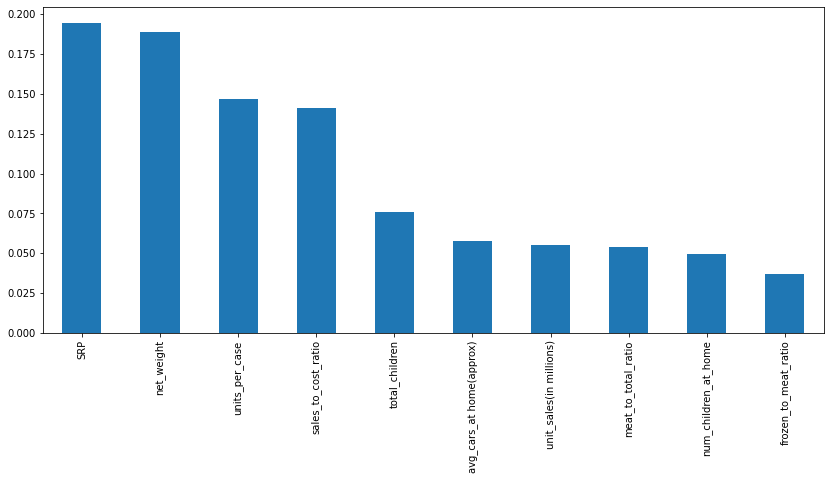

In [ ]:
pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))

Setting a threshold of approximately 5 percent for relative feature importances, we will not include frozen_to_meat_ratio as a predictor in our models.

We will now experiment with all the remaining attributes.

In [23]:
X_new = df.drop(['frozen_to_meat_ratio'], axis = 1)

In [24]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 0)

In [25]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state = 0, max_features = 10, n_estimators = 1000)
model_rf_new = randomforest.fit(X_train_new, y_train)
y_test_pred_new = model_rf_new.predict(X_test_new)

In [26]:
model_rf_new.feature_importances_

array([0.02448912, 0.04219158, 0.03491439, 0.02567854, 0.06993244,
       0.06877169, 0.05954323, 0.0554463 , 0.03285098, 0.01297446,
       0.01177668, 0.00819187, 0.00772582, 0.00540881, 0.00551133,
       0.00659327, 0.25864574, 0.00978413, 0.0083107 , 0.00700185,
       0.00521318, 0.01292645, 0.0157621 , 0.00524986, 0.01066574,
       0.00703044, 0.00997289, 0.00808442, 0.00874649, 0.008034  ,
       0.00853476, 0.01031682, 0.0097085 , 0.01032932, 0.01548842,
       0.00494233, 0.00508242, 0.00328691, 0.00990897, 0.00936781,
       0.00763849, 0.00470091, 0.00376851, 0.00310051, 0.0016931 ,
       0.00522392, 0.00553312, 0.00210863, 0.00190067, 0.00041761,
       0.01102914, 0.00157258, 0.00613602, 0.00421885, 0.00656317])

In [27]:
X_new.columns.to_numpy()

array(['unit_sales(in millions)', 'total_children',
       'avg_cars_at home(approx)', 'num_children_at_home', 'SRP',
       'net_weight', 'units_per_case', 'sales_to_cost_ratio',
       'meat_to_total_ratio', 'recyclable_package', 'low_fat',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'media_type_labeled', 'food_family_Food',
       'food_family_Non-Consumable', 'sales_country_Mexico',
       'sales_country_USA', 'marital_status_S', 'gender_M',
       'education_Graduate Degree', 'education_High School Degree',
       'education_Partial College', 'education_Partial High School',
       'member_card_Golden', 'member_card_Normal', 'member_card_Silver',
       'occupation_Management', 'occupation_Manual',
       'occupation_Professional', 'occupation_Skilled Manual',
       'houseowner_Y', 'avg. yearly_income_$110K - $130K',
       'avg. yearly_income_$130K - $150K', 'avg. yearly_income_$150K +',
       'avg. yearly_income_$30K - $50K', 'avg. yearl

In [28]:
feature_significances = pd.DataFrame(data = model_rf_new.feature_importances_, index = X_new.columns.to_numpy(), columns = ['feature significance'])
feature_significances.sort_values('feature significance', ascending = False)

,feature significance
media_type_labeled,0.258646
SRP,0.069932
net_weight,0.068772
units_per_case,0.059543
sales_to_cost_ratio,0.055446
total_children,0.042192
avg_cars_at home(approx),0.034914
meat_to_total_ratio,0.032851
num_children_at_home,0.025679
unit_sales(in millions),0.024489


In [31]:
from sklearn.metrics import mean_squared_error
forest_all_mse = mean_squared_error(y_test, y_test_pred_new, squared=False)
forest_all_mse

18.213818022170365

According to the results, we will select variables with a feature importance of greater than or equal to 0.015 as our predictors.

In [ ]:
X_final = df[['media_type_labeled', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'total_children', 'avg_cars_at home(approx)', 'meat_to_total_ratio',
              'num_children_at_home', 'unit_sales(in millions)', 'gender_M', 'houseowner_Y']]